# Лабораторная работа №3

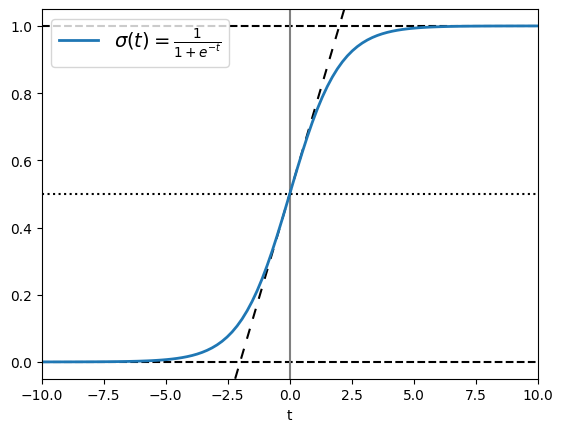

In [1]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

fig, ax = plt.subplots()
ax.axhline(y=0, color="black", linestyle="--")
ax.axhline(y=0.5, color="black", linestyle=":")
ax.axhline(y=1.0, color="black", linestyle="--")
ax.axvline(color="grey")
ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
ax.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
ax.set(xlim=(-10, 10), xlabel="t")
ax.legend(fontsize=14)
plt.show()